# ...

Ldjfkajldsjf


In [9]:
# Load in packages
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd


### Slide 2


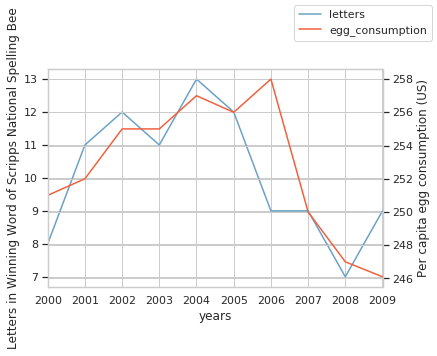

In [215]:
# Data from http://tylervigen.com/  http://tylervigen.com/view_correlation?id=3124

years = np.array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009])
letters = np.array([8, 11, 12, 11, 13, 12, 9, 9, 7, 9]);
eggconsumption = np.array([251, 252, 255, 255, 257, 256, 258, 250, 247, 246.1])
letterseggs_df = pd.DataFrame({"years": years, "letters":letters, "egg_consumption": eggconsumption})

# Plot!
ax = letterseggs_df.plot(x="years", y="letters", legend=False, color = "#6aa1c4")
ax2 = ax.twinx()
letterseggs_df.plot(x="years", y="egg_consumption", ax=ax2, legend=False, color="#f15f3d")
ax.figure.legend()
ax.set_ylabel("Letters in Winning Word of Scripps National Spelling Bee")
ax2.set_ylabel("Per capita egg consumption (US)")


plt.savefig("slide1.pdf")

0.6829084616792721
5.576666666666667


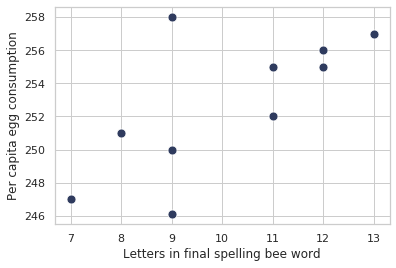

In [206]:
print(stats.pearsonr(letters,eggconsumption)[0])
print(np.cov(letters,eggconsumption)[0,1])

fig12 = sns.scatterplot(letters, eggconsumption, color = "#2f3b5e", s=80)
fig12.set(xlabel="Letters in final spelling bee word", ylabel="Per capita egg consumption");
plt.savefig("Spellingscatter.pdf")


### Slide 12? Gene expression of cancer genes

In [24]:
depmap_info = pd.read_csv("data/sample_info.csv")
depmap_expression_raw = pd.read_csv("data/CCLE_expression.csv")

# depmap_crispr_raw.rename(columns={"Unnamed: 0": "DepMap_ID"})

# Move DepMap_ID to last columnn
# depmap_ids = depmap_crispr_raw["Unnamed: 0"]
# depmap_crispr_raw['DepMap_ID'] = depmap_ids

In [25]:
print(len(depmap_expression_raw.columns))
depmap_expression_cellIDs = depmap_expression_raw["Unnamed: 0"]
depmap_expression_raw.pop('Unnamed: 0')
depmap_expression_raw['DepMap_ID'] = depmap_expression_cellIDs
depmap_expression_raw.head()
print(len(depmap_expression_raw.columns))
nGenes = len(depmap_expression_raw.columns)-1

19145
19145


In [26]:
depmap_expression = pd.merge(depmap_expression_raw,depmap_info,on = "DepMap_ID", how= "left")
a375_all_data = depmap_expression.loc[depmap_expression["CCLE_Name"] == "A375_SKIN", :]
a375_expression = a375_all_data.iloc[0, 0:nGenes]

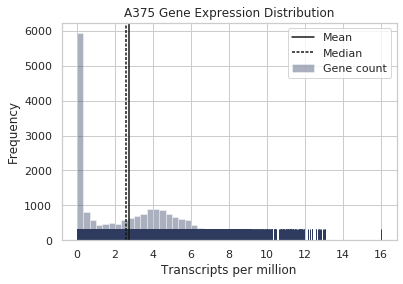

Mean: 2.731079112579036
Median: 2.57531233068744
Mode: 0.0


In [105]:
sns.set(style="whitegrid", palette="dark")

mean_color = '#141912'
median_color = '#141912'

# To get the rug plot by itself, use sns.rugplot

fig = sns.distplot(a375_expression, kde = False, label = 'Gene count', rug=True, color="#2f3b5e")
fig.axvline(a375_expression.mean(), label = 'Mean', color = mean_color)
fig.axvline(a375_expression.median(), label = 'Median', color = median_color, dashes = (2,1,2,1))
fig.set(xlabel='RNA Count', ylabel='Frequency', title = "A375 Gene Expression Distribution")
fig.legend()
plt.show()
print(f'Mean: {a375_expression.mean()}')
print(f'Median: {a375_expression.median()}')
print(f'Mode: {a375_expression.mode()[0]}')
fig.figure.savefig("Expression_distribution.pdf")

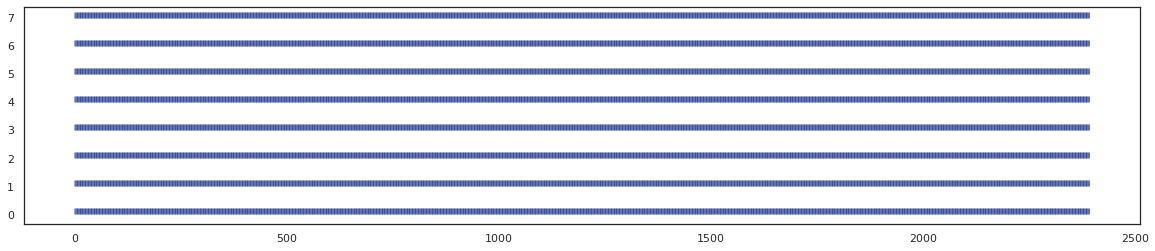

In [148]:
# Make dot for every gene. 
nr = 8
nc = nGenes/nr
sns.set_style("white")
x = []
y= []
for i in np.arange(nr):
    for j in np.arange(nc):
        x.append(i)
        y.append(j)
plt.figure(figsize=(20,4))
fig3 = sns.scatterplot(y,x, alpha = 0.5, marker=2)
plt.savefig("allgenes.pdf")


3.139304379176061
0.35162868112469375


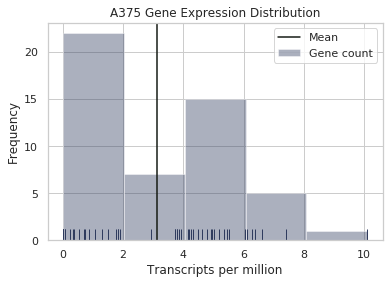

In [184]:
# Randomly sample n = 100 points from the gene expression data
n = 50
sample_1 = np.random.choice(a375_expression, n, replace = False)
print(sample_1.mean())
print(stats.sem(sample_1))
sns.set_style("whitegrid")

# Plot histogram
# if we want relative frequency, set norm_hist = True
fig_1 = sns.distplot(sample_1, rug = True, kde = False, label = 'Gene count', color="#2f3b5e")
fig_1.axvline(sample_1.mean(), label = 'Mean', color = mean_color)
#fig_1.axvline(np.median(sample_1), label = 'Median', color = median_color, dashes = (2,1,2,1))
fig_1.set(xlabel='Transcripts per million', ylabel='Frequency', title = "A375 Gene Expression Distribution")
fig_1.legend()
plt.show()
fig_1.figure.savefig("geneexpression_sample50.pdf")

In [181]:
## Sample many times and plot the distribution of means
n = 10
n_replicates = 100
sample_mean_vec = np.zeros((1,n_replicates))

for rep in range(n_replicates):
    
    # Sample randomly n points from the population
    sample_i = np.random.choice(a375_expression, n, replace = False)
    
    # Compute the mean of the sample
    sample_i_mean = np.mean(sample_i)
    
    # Store the mean
    sample_mean_vec[0, rep] = sample_i_mean

print("done with experiment")

done with experiment


/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:207: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]


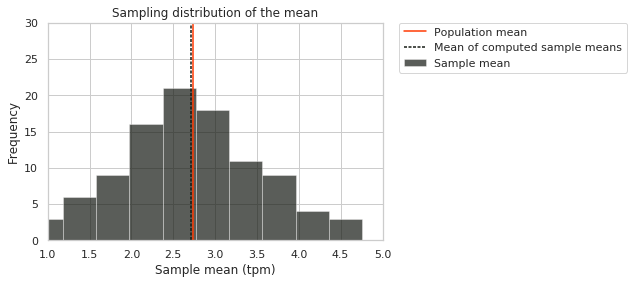

In [183]:
# Histogram of the means

fig_2 = sns.distplot(sample_mean_vec, rug = False, kde = False, label = 'Sample mean',hist_kws={"linewidth": 0.5,
                            "alpha": 0.7, "color": mean_color})
fig_2.axvline(a375_expression.mean(), label = 'Population mean', color = '#ff3800')
fig_2.axvline(np.mean(sample_mean_vec), label = 'Mean of computed sample means', color = mean_color, dashes = (2,1,2,1))
fig_2.set(xlabel='Sample mean (tpm)', ylabel='Frequency', title = "Sampling distribution of the mean", ylim = (0,30), xlim=(1,5))
fig_2.legend()
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
lgd = plt.legend(loc=2, bbox_to_anchor=(1.05,1), borderaxespad = 0.0)
plt.show()
fig_2.figure.savefig("geneexpression_samplingdistmean10.pdf",bbox_extra_artists=(lgd,), bbox_inches='tight')

## Squirrel census

from https://www.thesquirrelcensus.com/

In [108]:
# Import data
pd.set_option('display.max_columns', None)
squirrels_data = pd.read_csv('data/2018_Central_Park_Squirrel_Census_-_Squirrel_Data.csv')
squirrels_data.head()

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,Combination of Primary and Highlight Color,Color notes,Location,Above Ground Sighter Measurement,Specific Location,Running,Chasing,Climbing,Eating,Foraging,Other Activities,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,+,NaN,NaN,NaN,NaN,False,False,False,False,False,NaN,False,False,False,False,False,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086),NaN,19,4,19,13
1,-73.957044,40.794851,37E-PM-1006-03,37E,PM,10062018,3,Adult,Gray,Cinnamon,Gray+Cinnamon,NaN,Ground Plane,FALSE,NaN,True,False,False,False,False,NaN,False,False,False,False,False,False,False,True,me,POINT (-73.9570437717691 40.794850940803904),NaN,19,4,19,13
2,-73.976831,40.766718,2E-AM-1010-03,02E,AM,10102018,3,Adult,Cinnamon,NaN,Cinnamon+,NaN,Above Ground,4,NaN,False,False,True,False,False,NaN,False,False,False,False,False,False,True,False,NaN,POINT (-73.9768311751004 40.76671780725581),NaN,19,4,19,13
3,-73.975725,40.769703,5D-PM-1018-05,05D,PM,10182018,5,Juvenile,Gray,NaN,Gray+,NaN,Above Ground,3,NaN,False,False,True,False,False,NaN,False,False,False,False,False,False,False,True,NaN,POINT (-73.9757249834141 40.7697032606755),NaN,19,4,19,13
4,-73.959313,40.797533,39B-AM-1018-01,39B,AM,10182018,1,NaN,NaN,NaN,+,NaN,Above Ground,NaN,NaN,False,False,False,False,False,unknown,True,False,False,False,False,False,False,False,NaN,POINT (-73.9593126695714 40.797533370163),NaN,19,4,19,13


In [109]:
fireball_data = pd.read_csv('data/Fireball_And_Bolide_Reports.csv')
fireball_data.head()

,Date/Time - Peak Brightness (UT),Latitude (Deg),Longitude (Deg),Altitude (km),Velocity (km/s),Velocity Components (km/s): vx,Velocity Components (km/s): vy,Velocity Components (km/s): vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,11/21/2009 08:53:00 PM,22.0S,29.2E,38.0,32.1,3.0,-17.0,-27.0,10000000000000,18.00
1,01/09/2015 10:41:11 AM,2.0N,28.8E,36.0,NaN,-10.7,-7.6,11.6,139000000000,0.41
2,05/16/2014 12:42:48 PM,44.2S,176.2W,44.0,NaN,14.4,4.6,6.5,309000000000,0.82
3,08/23/2014 06:29:41 AM,61.7S,132.6E,22.2,16.2,-2.3,5.7,16.5,3820000000000,7.60
4,12/12/2014 06:48:11 AM,33.5N,144.9E,26.3,NaN,11.5,-2.8,-2.2,33000000000,0.11


In [110]:
# Extract impact energy
fireball_data["Calculated Total Impact Energy (kt)"]

0     18.00
1      0.41
2      0.82
3      7.60
4      0.11
      ...  
87     0.63
88     0.15
89     0.39
90     0.27
91     0.39
Name: Calculated Total Impact Energy (kt), Length: 92, dtype: float64

In [207]:
# Data from Taylor Patch
data_vec = [5,7,7,3,12,3,8,6,8,4,5,9,8,8,9,7,10,7,12,2,7,11,3,9,6,3,8,7,5,2,7,3,5,12,7,2,2,3,8,8,8,4,7,7,4,8,7,8,10,8,6,10,4,9,6,7,3,9,11,5,8,7,11,5,5,5,9,8,7,5,10,4,9,4,8,7,11,6,8,7,10,9,8,3,7,8,2,8,11,4,10,8,11,5,5,9,8,7,7,8,3,4,5,8,8,8,6,8,5,11,8,9,5,2,4,5,5,9,5,5,7,7,8,7,4,4,8,11,4,8,7,5,10,7,7,4,10,7,11,9,9,7,2,7,5,8,6,3,5,9,7,6,7,6,6,5,6,3,3,8,8,12,9,3,4,6,9,12,10,9,6,9,10,5,11,7,9,8,7,2,7,4,7,10,4,11,11,7,6,2,12,11,4,10,7,6,4,11,7,10,5,6,9,5,2,11,9,7,8,7,2,6,3,5,6,3,2,8,6,6,10,7,10,7,5,10,7,6,7,6,9,5,7,3,10,4,4,2,10,7, 7, 7, 3, 7, 3, 8, 8, 9, 5, 3, 4, 6, 6, 10, 7, 6, 6, 8, 7, 8, 4, 3, 8, 5, 12, 8, 4, 3, 11, 10, 8, 7, 9, 11, 9, 5, 7, 9, 3, 10, 7, 6, 8, 7, 6, 10, 6, 5, 8, 4, 9, 2, 6, 5, 5, 8, 7, 5, 7, 5, 2, 10, 10, 8, 11, 9, 10, 4, 6, 8, 4, 10, 6, 4, 7, 8, 8, 7, 7, 11, 8, 5, 9, 8, 6, 3, 6, 5, 6, 7, 6, 9, 7, 11, 7, 4, 9, 7, 11, 8, 4, 7, 3, 7, 9, 2, 10, 5, 9, 6, 4, 6, 4, 7, 7, 10, 8, 9, 7, 6, 9, 6, 7, 4, 6, 9, 6, 8, 7, 5, 6, 8, 4, 3, 7, 6, 6, 3, 8, 7, 7, 7, 4, 8, 8, 12, 9, 4, 11, 9, 8, 6, 7, 7, 4, 9, 8, 9, 3, 7, 10, 9, 10, 6, 6, 5, 9, 11, 7, 5, 7, 8, 3, 7, 7, 8, 6, 3, 8, 7, 4, 3, 8, 6, 10, 8, 7, 11, 3, 7, 11, 7, 11, 11, 11, 4, 6, 8, 5, 5, 3, 10, 8, 5, 6, 12, 5, 11, 11, 12, 4, 5, 9, 5, 9, 4, 10, 7, 6, 7, 8, 8, 2, 7, 7, 7, 6, 8, 3, 6, 5, 4, 10, 8, 7, 4, 8, 9, 7, 4, 8, 10, 7, 9, 5, 6, 9, 8, 5, 7, 7, 4, 9, 11, 6, 10, 3, 10, 6, 7, 5, 6, 5, 7, 3, 5, 5, 8, 11, 6, 8, 9, 10, 6, 3, 5, 7, 5, 7, 6, 2, 10, 6, 4, 8, 5, 6, 10, 5, 11, 8, 8, 5, 11, 7, 8, 7, 6, 7, 9, 2, 7, 4, 6, 8, 2, 9, 8, 10, 8, 7, 4, 7, 5, 4, 5, 7, 11, 7, 6, 8, 8, 5, 11, 9, 9, 10, 3, 2, 7, 5, 7, 8, 8, 10, 9, 7, 9, 7, 7, 8, 6, 8, 5, 7, 11, 6, 8, 10, 7, 9, 8, 5, 8, 7, 8, 10, 5, 4, 6, 8, 6, 11, 7, 4, 9, 10, 7, 7, 5, 11, 7, 8, 5, 10, 3, 12, 9, 7, 9, 3, 5, 11, 9, 5, 10, 4, 3, 8, 5, 6, 8, 3, 8, 9, 3, 10, 5, 6, 6, 10, 9, 7, 6, 7, 9, 11, 7, 6, 8, 11, 6, 6, 7, 2, 9, 6, 12, 10, 12, 7, 9, 9, 10, 5, 6, 10, 6, 7, 8, 4, 6, 4, 7, 4, 7, 10, 5, 6, 9, 8, 12, 8, 10, 5, 4, 6, 9, 12, 10, 3, 6, 9, 9, 6, 5, 5, 8, 8, 6, 11, 5, 4, 2, 8, 3, 10, 11, 11, 3, 7, 11, 6, 5, 10, 8, 7, 6, 7, 10, 7, 9, 7, 4, 8, 7, 11, 8, 6, 8, 10, 2, 7, 7, 8, 8, 8, 8, 10, 10, 4, 5, 8, 6, 6, 4, 11, 2, 8, 6, 8, 7, 8, 10, 6, 6, 6, 11, 8, 8, 4, 6, 8, 10, 3, 8, 7, 7, 8, 7, 2, 4, 4, 6, 8, 6, 4, 11, 10, 7, 7, 5, 9, 4, 9, 11, 6, 4, 9, 11, 6, 8, 3, 9, 6, 7, 5, 5, 7, 4, 8, 6, 11, 8, 7, 4, 11, 3, 11, 9, 7, 12, 7, 7, 3, 10, 8, 8, 10, 3, 8, 8, 9, 3, 7, 8, 8, 8, 7, 8, 8, 2, 9, 8, 4, 8, 7, 3, 8, 2, 9, 7, 7, 10, 8, 10, 3, 7, 6, 7, 3, 9, 4, 6, 10, 7, 8, 9, 10, 8, 6, 8, 4, 5, 9, 8, 8, 7, 7, 8, 4, 9, 7, 8, 5, 4, 3, 8, 11, 6, 4, 7, 6, 5, 6, 5, 10, 6, 11, 3, 9, 8, 7, 9, 6, 3, 7, 7, 6, 9, 10, 7, 9, 3, 10, 4, 9, 3, 9, 9, 7, 11, 3, 7, 10, 7, 12, 8, 8, 7, 9, 9, 9, 6, 8, 5, 5, 6, 7, 7, 6, 11, 11, 7, 10, 6, 10, 10, 4, 5, 6, 10, 8, 4, 11, 9, 5, 8, 2, 3, 7, 5, 7, 9, 3, 7, 4, 6, 5, 4, 11, 8, 3, 6, 4, 8, 8, 5, 10, 11, 6, 4, 10, 7, 11, 6, 10, 7, 3, 4, 11, 5, 8, 8, 6, 9, 10, 6, 7, 9, 3, 5, 7, 6, 6, 11, 9, 3, 10, 9, 7, 5, 6, 4, 10, 9, 10, 4, 9, 7, 6, 7, 6, 8, 9, 10, 9, 10, 7, 8, 4, 9, 5, 5, 8, 9, 7, 4, 7, 4, 6, 9, 7, 4, 5, 5, 10, 7, 8, 9, 8, 9, 7, 9, 9, 7, 9, 9, 7, 10, 7, 5, 9, 8, 8, 5, 4, 10, 11, 4, 10, 5, 11, 8, 4, 5, 12, 12, 7, 10, 10, 8, 7, 9, 7, 5, 7, 9, 7, 9, 7, 12, 9, 9, 2, 6, 7, 7, 4, 9, 7, 4, 3, 10, 11, 5, 4, 9, 6, 10, 9, 2, 6, 7, 8, 10, 7, 6, 5, 9, 8, 7, 8, 8, 2, 10, 11, 6, 7, 6, 6, 7, 6, 6, 6, 9, 9, 9, 9, 11, 5, 6, 4, 10, 4, 7, 5, 11, 8, 8, 9, 8, 4, 3, 9, 6, 5, 7, 8, 7, 4, 7, 4, 5, 3, 3, 8, 6, 2, 7, 4, 6, 10, 7, 7, 9, 5, 7, 6, 8, 8, 6, 8, 6, 10, 9, 8, 8, 12, 9, 11, 6, 8, 7, 8, 5, 10, 7, 8, 7, 6, 5, 5, 6, 7, 4, 7, 10, 10, 6, 8, 8, 7, 8, 10, 9, 11, 3, 3, 8, 3, 9, 9, 2, 3, 7, 7, 6, 8, 11, 5, 7, 6, 5, 6, 7, 5, 7, 9, 5, 6, 3, 10, 5, 9, 11, 6, 11, 8, 5, 10, 10, 8, 6, 4, 6, 3, 6, 5, 6, 8, 2, 7, 8, 8, 8, 8, 7, 7, 5, 10, 7, 3, 8, 2, 4, 8, 9, 6, 7, 8, 2, 2, 8, 7, 10, 6, 6, 10, 9, 4, 10, 10, 7, 10, 9, 6, 7, 4, 3, 6, 7, 8, 7, 11, 8, 9, 7, 4, 7, 9, 4, 6, 7, 8, 10, 5, 7, 6, 6, 6, 6, 4, 7, 3, 6, 2, 5, 6, 10, 10, 7, 8, 8, 4, 11, 5, 7, 8, 9, 4, 6, 10, 7, 6, 8, 8, 9, 8, 9, 9, 6, 5, 4, 4, 10, 8, 9, 7, 4, 9, 5, 7, 6, 9, 6, 6, 6, 10, 5, 7, 7, 6, 8, 6, 3, 9, 5, 8, 7, 6, 6, 10, 7, 9, 10, 7, 5, 9, 6, 8, 10, 12, 8, 11, 8, 7, 5, 6, 5, 8, 10, 2, 10, 6, 6, 3, 6, 11, 5, 7, 4, 9, 8, 9, 5, 4]

In [208]:
data_vec = np.array(data_vec)
# Run through the possible numbers and count the number of times each dice roll occurs.

possible_rolls = np.arange(2,13)   # Need numbers 2 - 12 inclusive.
outcome_count_array = np.zeros((len(possible_rolls),1))
for outcome in possible_rolls:
    print(outcome)
    outcome_count = sum(data_vec == outcome)
    print(f'Saw the number {outcome} rolled {outcome_count} times.')
    outcome_count_array[outcome-2, 0] = outcome_count
    

print(outcome_count_array.shape)

2
Saw the number 2 rolled 40 times.
3
Saw the number 3 rolled 81 times.
4
Saw the number 4 rolled 114 times.
5
Saw the number 5 rolled 137 times.
6
Saw the number 6 rolled 187 times.
7
Saw the number 7 rolled 250 times.
8
Saw the number 8 rolled 217 times.
9
Saw the number 9 rolled 153 times.
10
Saw the number 10 rolled 125 times.
11
Saw the number 11 rolled 81 times.
12
Saw the number 12 rolled 22 times.
(11, 1)


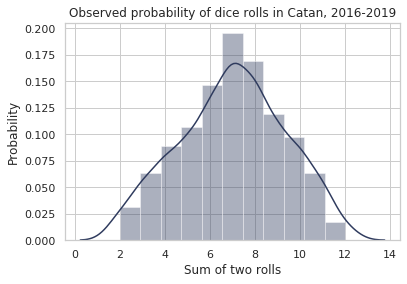

In [213]:
# Plot histogram!

fig_0 = sns.distplot(data_vec, color = '#2f3b5e', bins=11)
fig_0.set(xlabel = 'Sum of two rolls',
          ylabel = 'Probability',
          title = 'Observed probability of dice rolls in Catan, 2016-2019');


plt.savefig("Catan_observed.pdf")